# Facebook Ads
*Jaime Avendaño*  
  
This is a logistic regression notebook. The objective is to predict whether or not a customer will click on an add in Facebook.

### Dataset:
* Names
* Emails
* Country
* Time Spent on Site
* Salary

### Target:
* Clicked

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from janitor import clean_names
%matplotlib inline

In [6]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from joblib import dump

In [7]:
train = pd.read_csv('Course_Data\Facebook_Ads_2.csv', encoding='ISO-8859-1')
train = train.clean_names()
train.head()

,names,emails,country,time_spent_on_site,salary,clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [8]:
train.shape

(499, 6)

# EDA

In [9]:
# Balanced dataset
train.clicked.value_counts()

1    250
0    249
Name: clicked, dtype: int64

<Figure size 864x432 with 0 Axes>

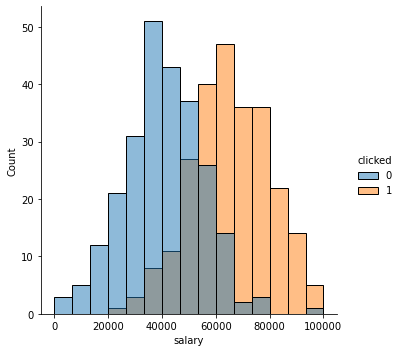

In [10]:
plt.figure(figsize=(12, 6))
sns.displot(data=train, x='salary', hue='clicked')

<Figure size 864x432 with 0 Axes>

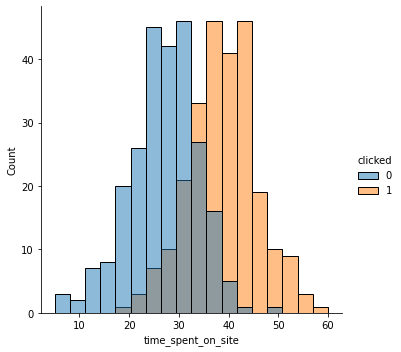

In [11]:
plt.figure(figsize=(12, 6))
sns.displot(data=train, x='time_spent_on_site', hue='clicked')

<AxesSubplot:xlabel='time_spent_on_site', ylabel='salary'>

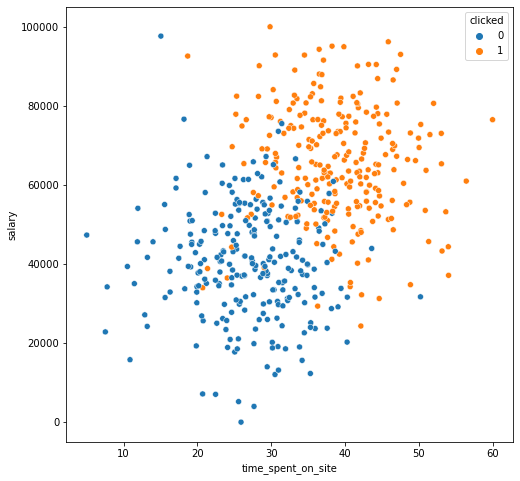

In [12]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=train, x='time_spent_on_site', y='salary', hue='clicked')

<AxesSubplot:xlabel='time_spent_on_site', ylabel='salary'>

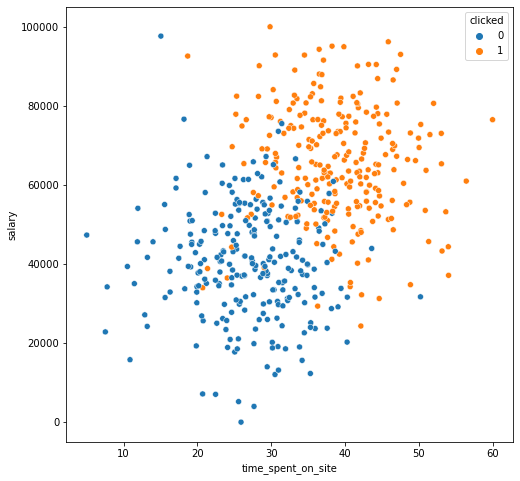

In [13]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=train, x='time_spent_on_site', y='salary', hue='clicked')

In [14]:
countries = train.country.value_counts()
print(f'# of Countries = {len(countries)}')
print(f'# of Countries w/ 1 user = {len(countries[countries == 1])}')
print(f'Max # of users = {max(countries)}')

# of Countries = 210
# of Countries w/ 1 user = 58
Max # of users = 6


In [15]:
email_providers = train.emails.str.split('@').str[-1].value_counts()
print(f'# of Email Providers = {len(email_providers)}')
print(f'# of Email Providers w/ 1 user = {len(email_providers[email_providers == 1])}')
print(f'Max # of users = {max(email_providers)}')

# of Email Providers = 481
# of Email Providers w/ 1 user = 464
Max # of users = 3


# Data Cleaning

1. Drop columns: names, emails, & country
2. Standard Scaler: salary & time

In [16]:
train = train.drop(columns=['names', 'emails', 'country'])

In [17]:
scaler = StandardScaler()
num_features = ['salary', 'time_spent_on_site']

scaler.fit(train[num_features])
train_scaled = pd.DataFrame(scaler.transform(train[num_features]), columns=num_features)
train = pd.concat([train.drop(columns=num_features), train_scaled], axis=1)

In [18]:
train.head()

,clicked,salary,time_spent_on_site
0,0,0.128258,-0.799458
1,1,1.378592,-0.051029
2,0,-0.621945,-1.316667
3,1,-0.830444,2.322233
4,0,-0.819281,0.146196


# Model Training

In [19]:
X = train.drop(columns=['clicked']).values
y = train.clicked.values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

# Model Testing

In [22]:
y_pred = classifier.predict(X_test)

<AxesSubplot:>

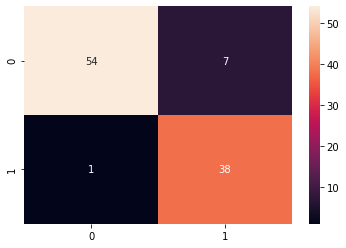

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.84      0.97      0.90        39

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



# Export Model

In [25]:
dump(scaler, 'Model_Data/facebook_ads_scaler.joblib')
dump(classifier, 'Model_Data/facebook_ads_classifier.joblib')

['Model_Data/facebook_ads_classifier.joblib']

In [26]:
train.time_spent_on_site.mean()

1.8128729423895497e-16

# Visualizing the border

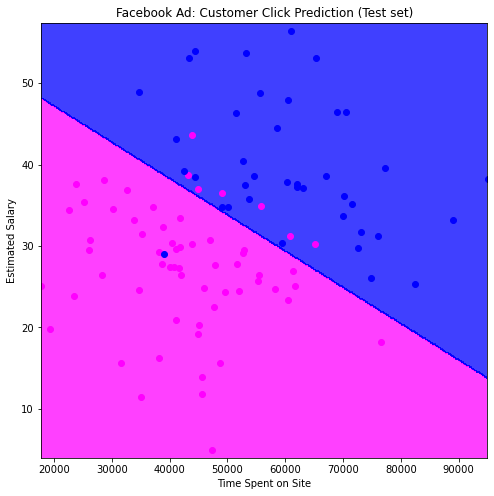

In [117]:
# plot the boundary using the trained classifier
# If classified as 0 it will be magenta, and if it is classified as 1 it will be shown in blue 
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8, 8))

x1_min, x2_min = scaler.inverse_transform([X_test[:,0].min(), X_test[:, 1].min()])
x1_max, x2_max = scaler.inverse_transform([X_test[:,0].max(), X_test[:, 1].max()])

X1, X2 = np.meshgrid(np.arange(start = x1_min - 1, stop = x1_max + 1, step = 200),
                     np.arange(start = x2_min - 1, stop = x2_max + 1, step = 0.2))

plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
X_test_unscaled = scaler.inverse_transform(X_test)
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test_unscaled[y_test == j, 0], X_test_unscaled[y_test == j, 1],
                c = 'magenta' if j == 0 else 'blue')

plt.title('Facebook Ad: Customer Click Prediction (Test set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.show()